**<h1><center>INTRODUCTION</center></h1>**

<h2><center>Heart FailurePrediction using Deep Learning/Machine learning algorithms</center></h2>



 In this project, we aim to explore the predictive capabilities of machine learning algorithms in identifying the likelihood of heart failure based on various clinical features. It's important to note that while we are leveraging medical data, I am not a medical professional, and this project is primarily an exercise in data analysis and predictive modeling.

 The dataset used in this study contains information on patients' demographic characteristics and several clinical factors believed to be associated with heart failure. These features include age, presence of anaemia, levels of creatinine phosphokinase, diabetes status, ejection fraction, presence of high blood pressure, platelet count, serum creatinine levels, serum sodium levels, and gender.

 Our goal is to develop predictive models that can assist in identifying individuals at higher risk of heart failure. Through this exploration, we hope to gain insights into the predictive power of machine learning algorithms in healthcare applications.


<center>
    <img src="https://familydoctor.org/wp-content/uploads/2000/09/42187220_l.jpg" alt="Alt text">
</center>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Importing the Necessary Libraries

In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score ## Evaluation Metrics

2024-05-23 21:37:09.810885: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 21:37:09.810933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 21:37:09.811867: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 21:37:09.818161: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
for dirnames, _, filenames in os.walk('/home/mosab-ahmed/DL_PROJECTS/Heart Failure Prediction'):
    print(filenames)



**<h1><center>DATA EXPLORATION & VISUALIZATATION</center></h1>**


### Loading the Data

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Description of the features : 
- **age**: Age of the patient

- **anaemia**: Haemoglobin level of patient (Boolean)

- **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)

- **diabetes**: If the patient has diabetes (Boolean)

- **ejection_fraction**: Percentage of blood leaving the heart at each contraction

- **high_blood_pressure**: If the patient has hypertension (Boolean)

- **platelets**: Platelet count of blood (kiloplatelets/mL)

- **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)

- **serum_sodium**: Level of serum sodium in the blood (mEq/L)

- **sex**: Sex of the patient

- **smoking**: If the patient smokes or not (Boolean)

- **time**: Follow-up period (days)

- **DEATH_EVENT**: If the patient deceased during the follow-up period (Boolean)

[Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

it's appeaaring that most of our data features are numerical data,not categorical, this will make the process faster !!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


What  are the categorical features ? 

- **Categorical Features/Attributes are** : Diabetes, High Blood Pressure, Sex, Smoking, Death Event

- **Numerical Features/Attributes are** : Age, Anaemia, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time

Let's Try to understand our data more (Demographic Insights):

In [7]:
df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

The minimum age in the dataset is 40, while the maximum age is 95 ! 

Let's take a look at the age distribution in our data

<Axes: ylabel='age'>

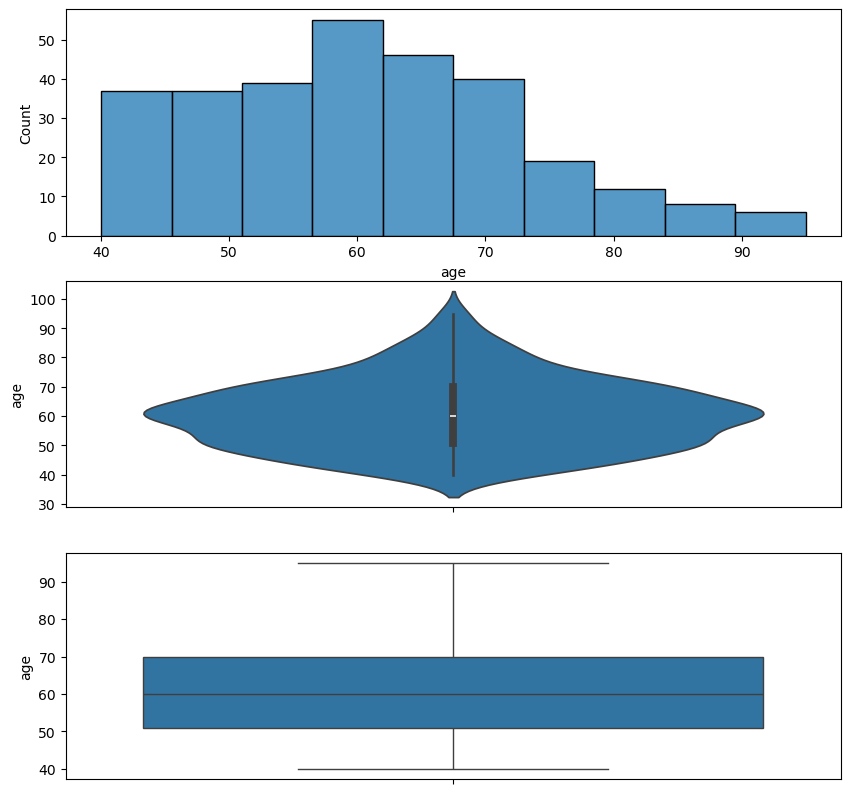

In [8]:
figure, axes =  plt.subplots(nrows=3,ncols=1, figsize=(10,10))
sns.histplot(df['age'], ax=axes[0])
sns.violinplot(df['age'], ax = axes[1])
sns.boxplot(df['age'], ax =axes[2])

- The youngest patient in the dataset is 40 years old, while the oldest is 95 years old.
- The majority of patients fall within the age range of 51 to 70 years, with 25% of patients aged 51 years or younger, 50% aged 60 years or younger, and 75% aged 70 years or younger.

In [9]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


seeing how age relates to other features : 

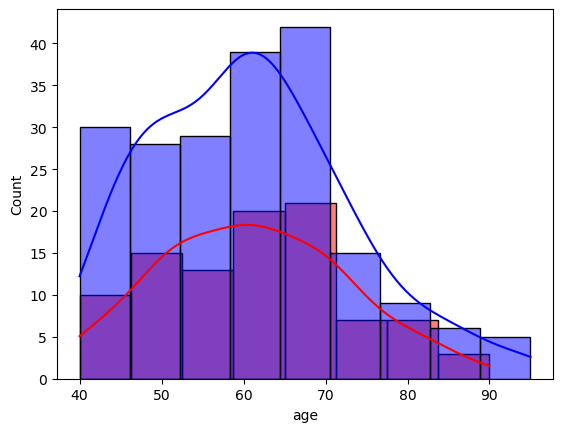

In [10]:
figure, axes2 = plt.subplots()
sns.histplot(df[df['smoking'] == 1]['age'], ax=axes2, kde = True, legend=True, color='red')
sns.histplot(df[df['smoking'] == 0]['age'], ax = axes2, kde = True, legend = True, color = 'blue')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


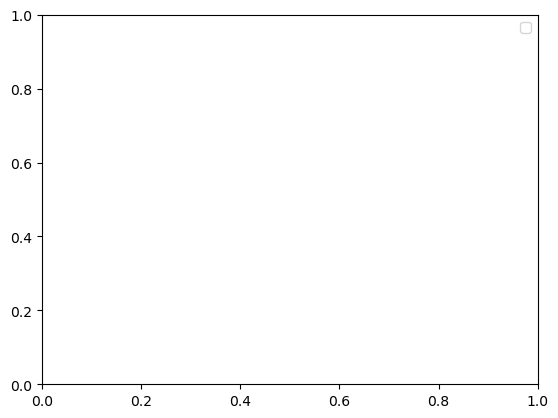

In [11]:
figure, axes2 = plt.subplots()

sns.histplot(df[df['diabetes'] == 'No diabetes']['age'], ax = axes2, kde = True,label = 'No diabetes', color = 'blue')
sns.histplot(df[df['diabetes'] == 'Diabetes']['age'], ax=axes2, kde = True, label = 'Diabetes', color='red')
axes2.legend()
plt.show()

**Creating age groups to know the relation between each group and other clinical parameters**

In [12]:
df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [13]:
# as the minimum age is 40 and the maximum is  95, we are going to do the follwing! 
bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-50', '51-60', '61-70', '71-80', '81-90', '91-100'] # Remember these bin labels SHOULD be one fewer than 

# create a new column of Age Group

df['age_group'] = pd.cut(df['age'], bins=bins, labels = labels, right = False)

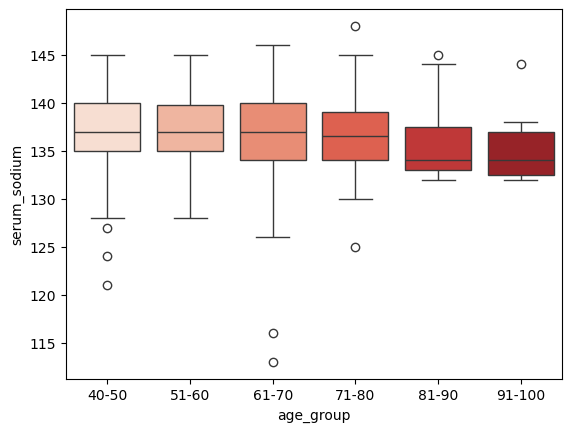

In [14]:
sns.boxplot(x = df['age_group'], y = df['serum_sodium'], palette='Reds')
plt.show()

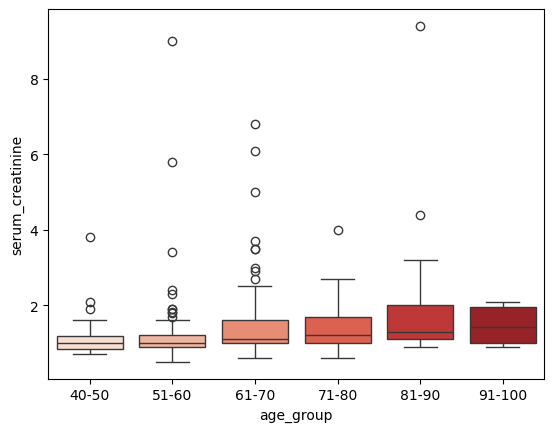

In [15]:
sns.boxplot(x = df['age_group'], y = df['serum_creatinine'], palette='Reds')
plt.show()

In [16]:
age_smoking = pd.crosstab(df['age_group'], df['smoking'], margins=True)

In [17]:
df[df['smoking'] == 1]['age'].describe()

count    96.000000
mean     61.156250
std      11.374328
min      40.000000
25%      52.000000
50%      60.000000
75%      70.000000
max      90.000000
Name: age, dtype: float64

In [18]:
df[df['smoking'] == 0]['age'].describe()

count    203.000000
mean      60.681448
std       12.157714
min       40.000000
25%       50.000000
50%       60.000000
75%       68.500000
max       95.000000
Name: age, dtype: float64

**Insights:**
- Comparison of Mean Ages: On average, smokers (61.16 years) are slightly older than non-smokers (60.68 years), but the difference is not substantial.
- Age Range: Both smokers and non-smokers exhibit a wide range of ages, from 40 to 90 years for smokers and from 40 to 95 years for non-smokers.
- Similar Quartiles: The quartiles for age distribution among smokers and non-smokers are quite similar, suggesting that age distribution does not vary significantly based on smoking status.

The percentage of smokers who have experienced heart failure VS the percenatge of non smokers who have experinced heart failure

In [19]:
# get the total number of patients : 
df.shape[0]

299

In [20]:
smokers = df[df['smoking'] ==  1]
nonsmokers = df[df['smoking'] == 0]

In [21]:
print(smokers[smokers['DEATH_EVENT'] == 1].shape[0])
print(nonsmokers[nonsmokers['DEATH_EVENT'] == 1].shape[0])

30
66


In [22]:
print(smokers[smokers['DEATH_EVENT'] == 0].shape[0])
print(nonsmokers[nonsmokers['DEATH_EVENT'] == 0].shape[0])

66
137


Lets  take a look at the other clinical parameters ! 

**First** , lets look at Diabetes and its relation to Heart Failure and Age as well as smoking ! 

**Second**, look for other clinical parameters (anemia, creatinine_phosphokinase, serum_creatinine, platelets, serum_sodium) and there relationship with our target variable (DEATH_EVENT)

**Third**, Does Sex Has anything to do with DEATH_EVENT ? 

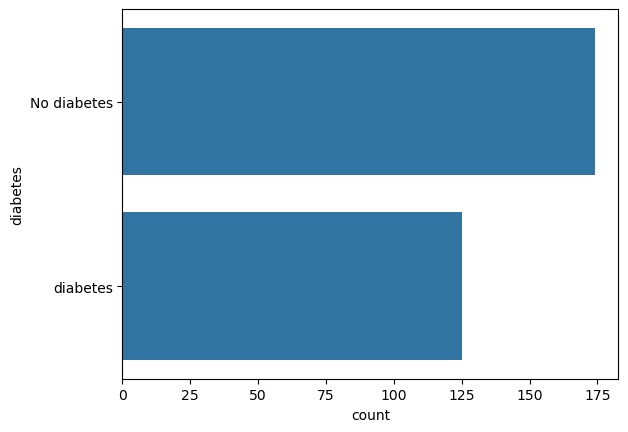

In [23]:
sns.countplot(df['diabetes'].astype('category').map({0:'No diabetes', 1:'diabetes'}))
plt.show()

In [24]:
# how many patients have diabetes ?
len(df[df['diabetes'] == 1])

125

In [25]:
len(df[df['diabetes'] == 0])

174

125 of the patients are having diabetes.

174 of the patients are not having diabetes.

is smoking and diabetes relate to each others ? 

In [26]:
df['sex'] = df['sex'].astype('category').map({0:'Female', 1: 'Male'})
df['diabetes'] = df['diabetes'].astype('category').map({0:'No diabetes', 1: 'Diabetes'})
df['smoking'] = df['smoking'].astype('category').map({0:'Non smokers', 1: 'Smokers'})

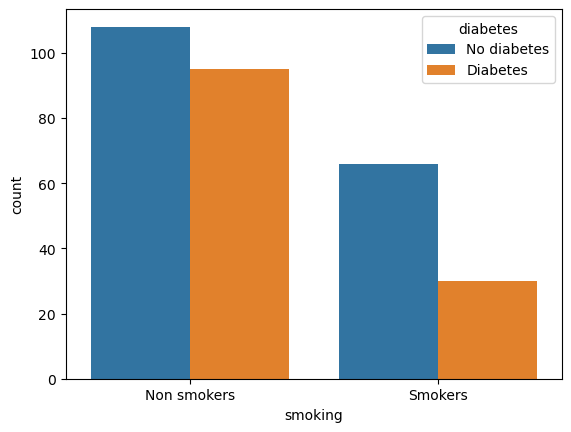

In [27]:
sns.countplot(x = df['smoking'], hue = df['diabetes'])
plt.show()

In [28]:
smoking_diabetes = pd.crosstab(df['smoking'], df['diabetes'], margins=True)

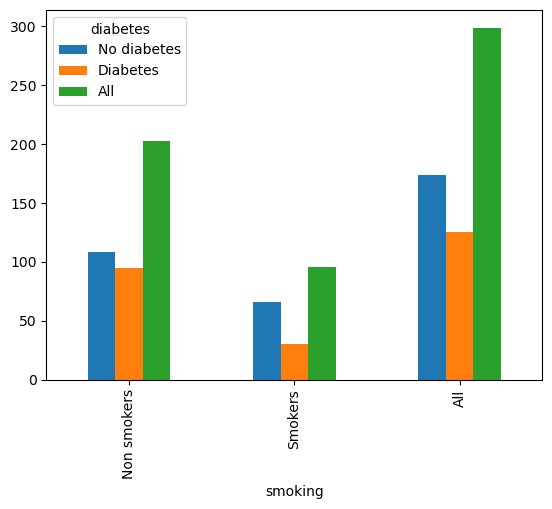

In [29]:
smoking_diabetes.plot(kind='bar')
plt.show()

Chi-Square Test to know more about the relationship between Diabetes and Smoking ! 

In [30]:
smoking_diabetes

diabetes,No diabetes,Diabetes,All
smoking,,,
Non smokers,108,95,203
Smokers,66,30,96
All,174,125,299


In [31]:
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(smoking_diabetes)
print(chi2)
print(p_value)


6.476344063190079
0.1662870146135136


In [32]:
chi2_contingency(smoking_diabetes)

Chi2ContingencyResult(statistic=6.476344063190079, pvalue=0.1662870146135136, dof=4, expected_freq=array([[118.13377926,  84.86622074, 203.        ],
       [ 55.86622074,  40.13377926,  96.        ],
       [174.        , 125.        , 299.        ]]))

Is Smoking and Sex relates to each other ?!

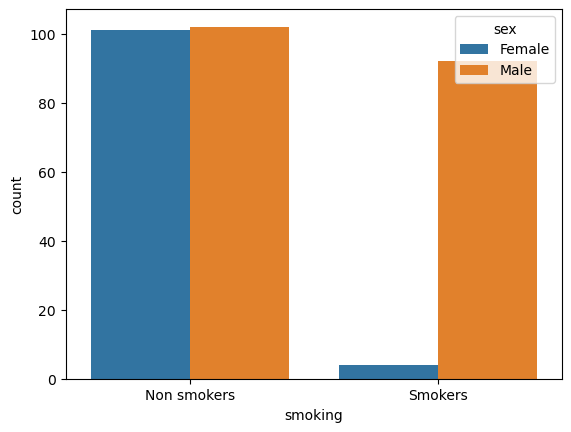

In [33]:
sns.countplot(x=df['smoking'], hue = df['sex'])
plt.show()

In [34]:
pd.crosstab(df['smoking'], df['sex'], margins= True)

sex,Female,Male,All
smoking,,,
Non smokers,101,102,203
Smokers,4,92,96
All,105,194,299


lets see the amount of males and females in our data Set

In [35]:
df['sex'].value_counts()

sex
Male      194
Female    105
Name: count, dtype: int64

**Gender Disparity in Smoking:**

There is a significant difference in smoking habits between genders. A much higher percentage of males (92 out of 194, approximately 47.4%) are smokers compared to females (4 out of 105, approximately 3.8%).

**Overall Smoking Prevalence:**

The overall smoking prevalence in the dataset is 96 out of 299 (approximately 32%).

##### lets take a look at the (clinical parameters) continious features/Attributes among the smokers and the non smokers

In [36]:
# list all the clinical parameters 
clinical_pa = ['creatinine_phosphokinase', 'ejection_fraction','platelets', 'serum_creatinine', 'serum_sodium']

###  Serum Creatinine 

**Serum Creatinine and Smoking Behaviour :** 

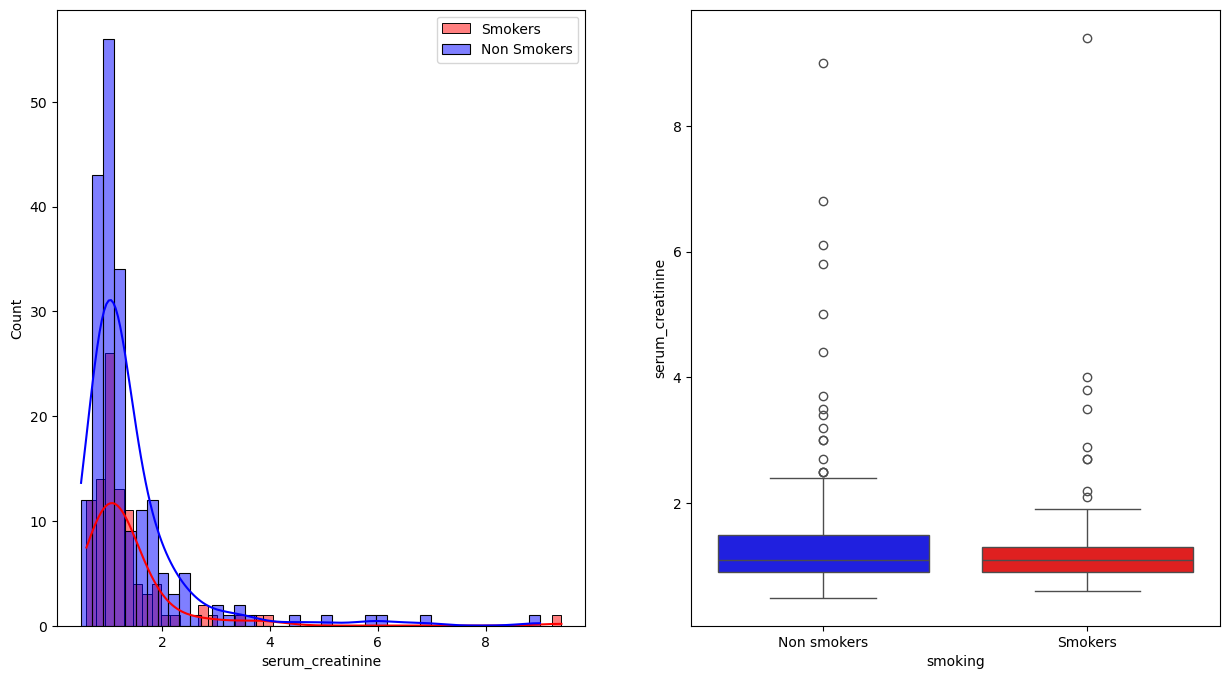

In [37]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['smoking'] == 'Smokers']['serum_creatinine'], ax=axes[0], kde = True, label = 'Smokers', color='red')
sns.histplot(df[df['smoking'] == 'Non smokers']['serum_creatinine'], ax = axes[0], kde = True, label = 'Non Smokers', color = 'blue')

pal = {'Smokers':'red', 'Non smokers': 'blue'}
sns.boxplot(x = df['smoking'], y = df['serum_creatinine'], palette=pal, ax=axes[1])
axes[0].legend()
plt.show()

**Serum Creatinine and Death  Event**

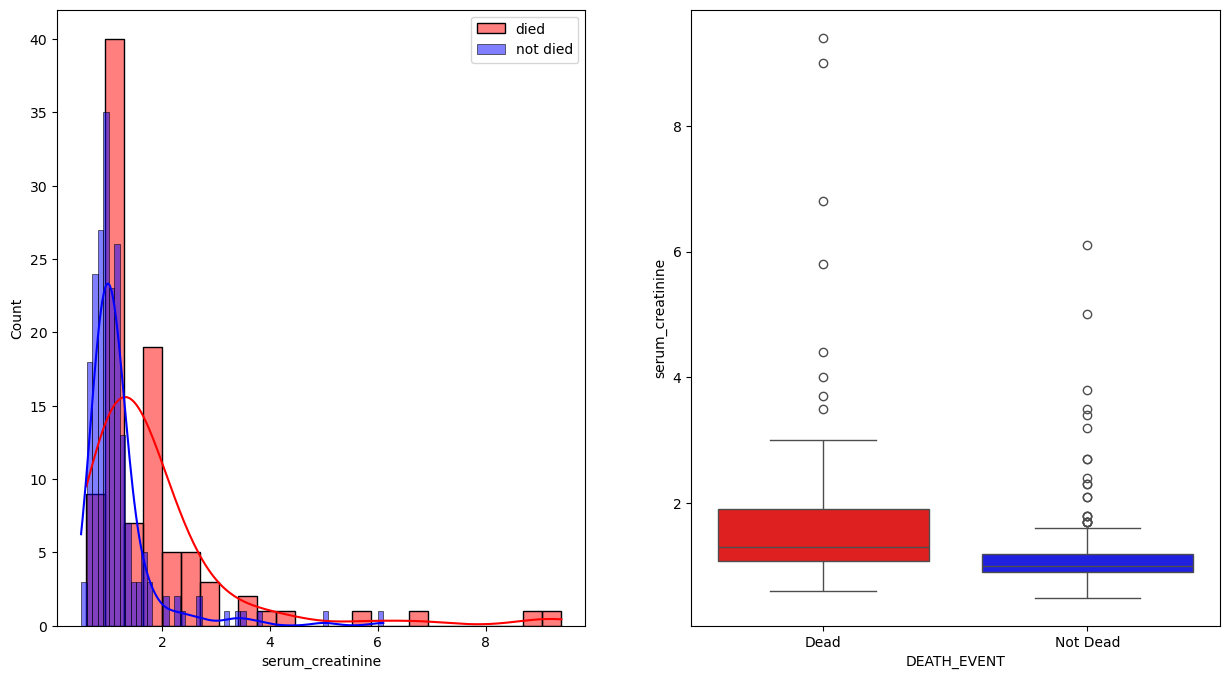

In [38]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['DEATH_EVENT'] == 1]['serum_creatinine'], ax=axes[0], kde = True, label = 'died', color='red')
sns.histplot(df[df['DEATH_EVENT'] == 0]['serum_creatinine'], ax = axes[0], kde = True, label = 'not died', color = 'blue')

df['DEATH_EVENT'].map({1:'1',0:'0'})
pal = {"Dead":'red', "Not Dead": 'blue'}
sns.boxplot(x = df['DEATH_EVENT'].map({1:'Dead', 0:'Not Dead'}), y = df['serum_creatinine'], palette=pal, ax=axes[1])
axes[0].legend()
plt.show()

**Serum Ccreatinine and Diabetes**

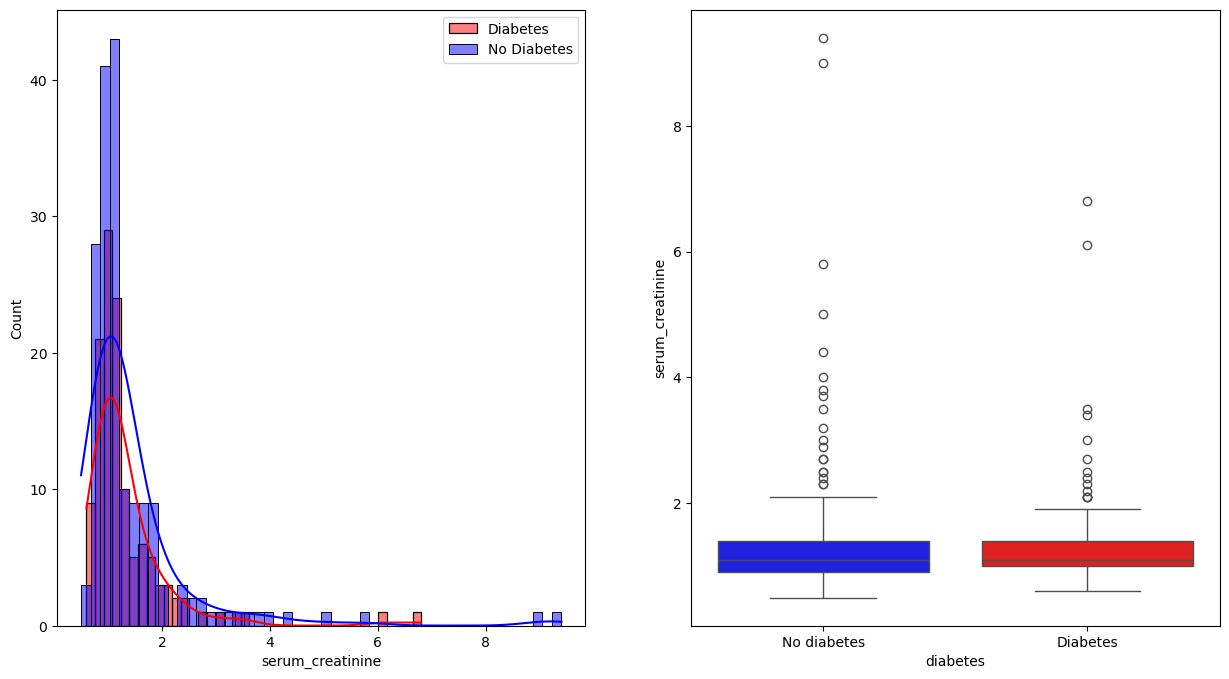

In [39]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['diabetes'] == 'Diabetes']['serum_creatinine'], ax=axes[0], kde = True, label = 'Diabetes', color='red')
sns.histplot(df[df['diabetes'] == 'No diabetes']['serum_creatinine'], ax = axes[0], kde = True, label = 'No Diabetes', color = 'blue')

pal = {'Diabetes':'red', 'No diabetes': 'blue'}
sns.boxplot(x = df['diabetes'], y = df['serum_creatinine'], palette=pal, ax=axes[1])
axes[0].legend()
plt.show()

### Serum Sodium	

**Serum Sodium and Smoking Behaviour**

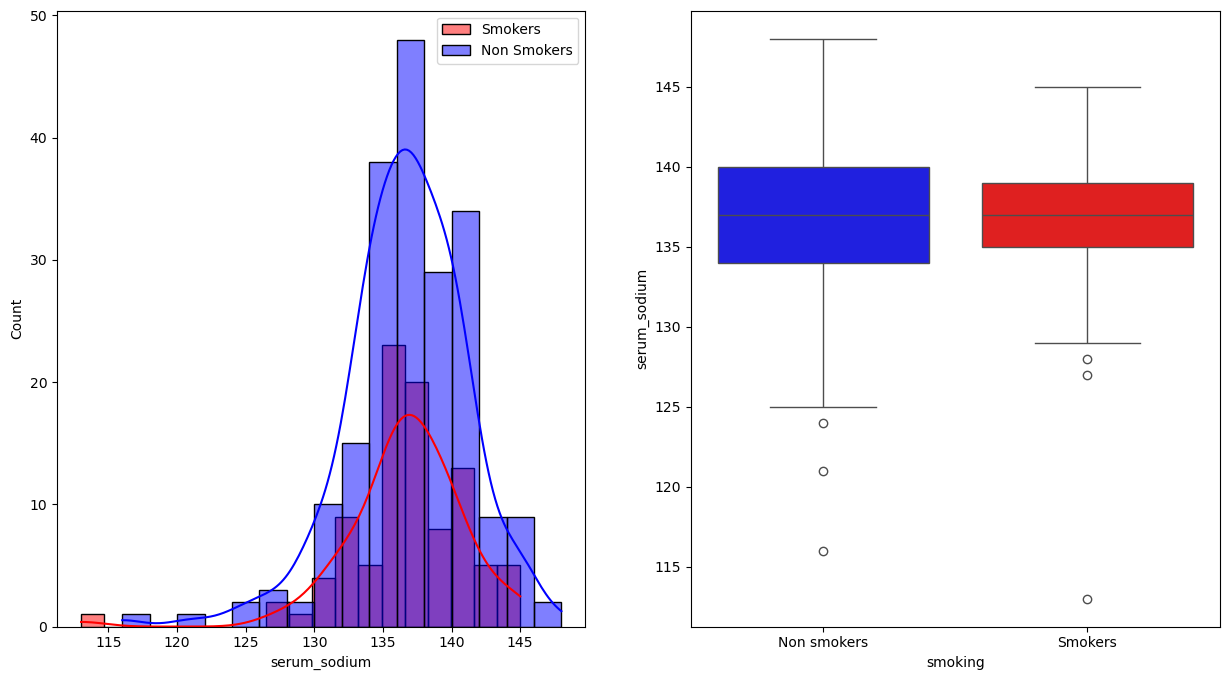

In [40]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['smoking'] == 'Smokers']['serum_sodium'], ax=axes[0], kde = True, label = 'Smokers', color='red')
sns.histplot(df[df['smoking'] == 'Non smokers']['serum_sodium'], ax = axes[0], kde = True, label = 'Non Smokers', color = 'blue')

pal = {'Smokers':'red', 'Non smokers': 'blue'}
sns.boxplot(x = df['smoking'], y = df['serum_sodium'], palette=pal, ax=axes[1])
axes[0].legend()
plt.show()

**Serum Sodium and Death Event**

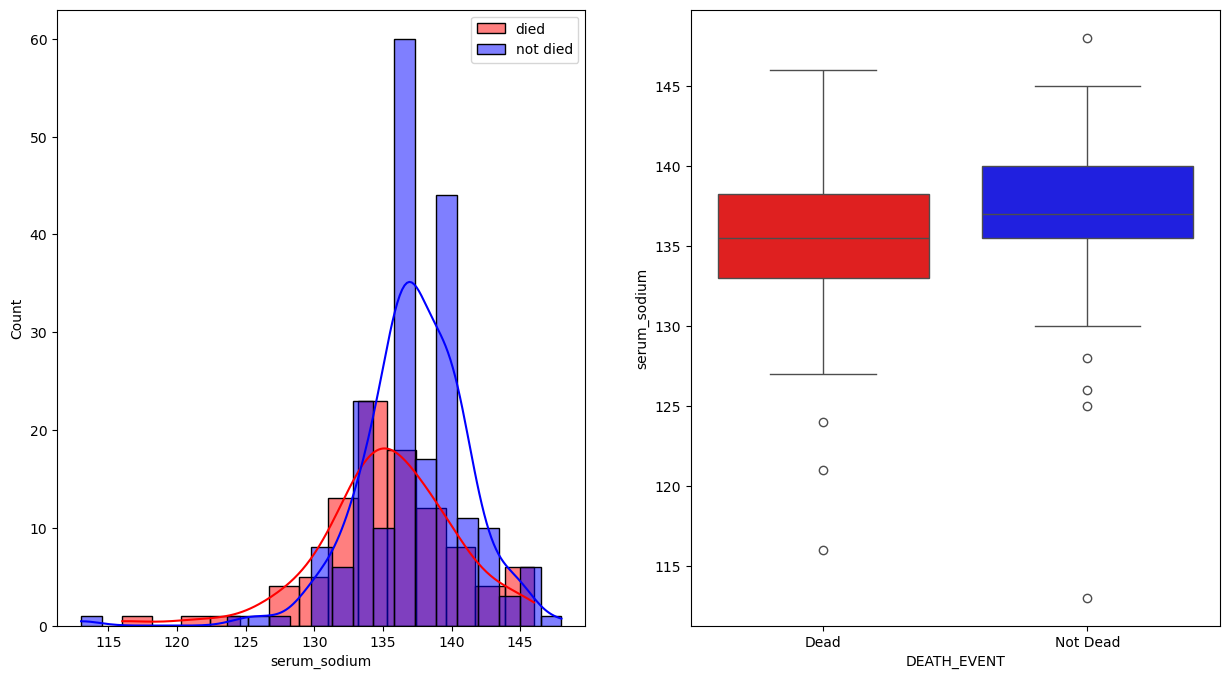

In [41]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['DEATH_EVENT'] == 1]['serum_sodium'], ax=axes[0], kde = True, label = 'died', color='red')
sns.histplot(df[df['DEATH_EVENT'] == 0]['serum_sodium'], ax = axes[0], kde = True, label = 'not died', color = 'blue')

df['DEATH_EVENT'].map({1:'1',0:'0'})
pal = {"Dead":'red', "Not Dead": 'blue'}
sns.boxplot(x = df['DEATH_EVENT'].map({1:'Dead', 0:'Not Dead'}), y = df['serum_sodium'], palette=pal, ax=axes[1])
axes[0].legend()
plt.show()

**Serum Sodium and Diabetes**

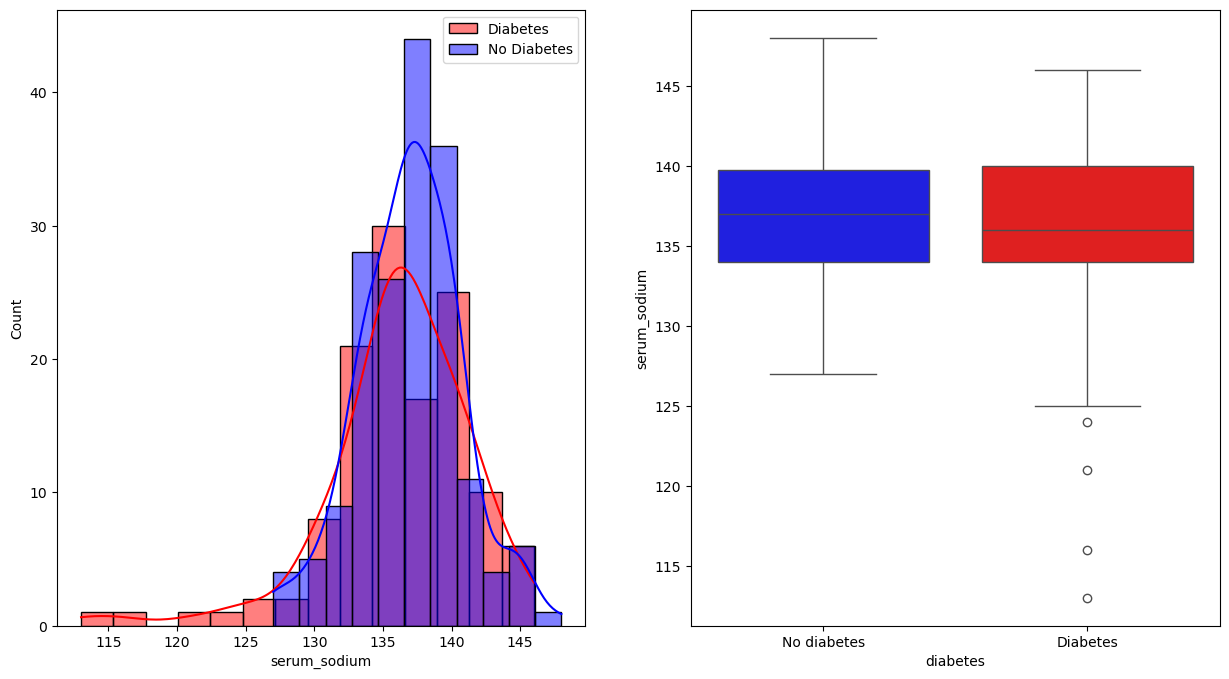

In [42]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['diabetes'] == 'Diabetes']['serum_sodium'], ax=axes[0], kde = True, label = 'Diabetes', color='red')
sns.histplot(df[df['diabetes'] == 'No diabetes']['serum_sodium'], ax = axes[0], kde = True, label = 'No Diabetes', color = 'blue')

pal = {'Diabetes':'red', 'No diabetes': 'blue'}
sns.boxplot(x = df['diabetes'], y = df['serum_sodium'], palette=pal, ax=axes[1])
axes[0].legend()
plt.show()

### creatinine phosphokinase

**creatinine phosphokinase and Smoking Behaviour** 

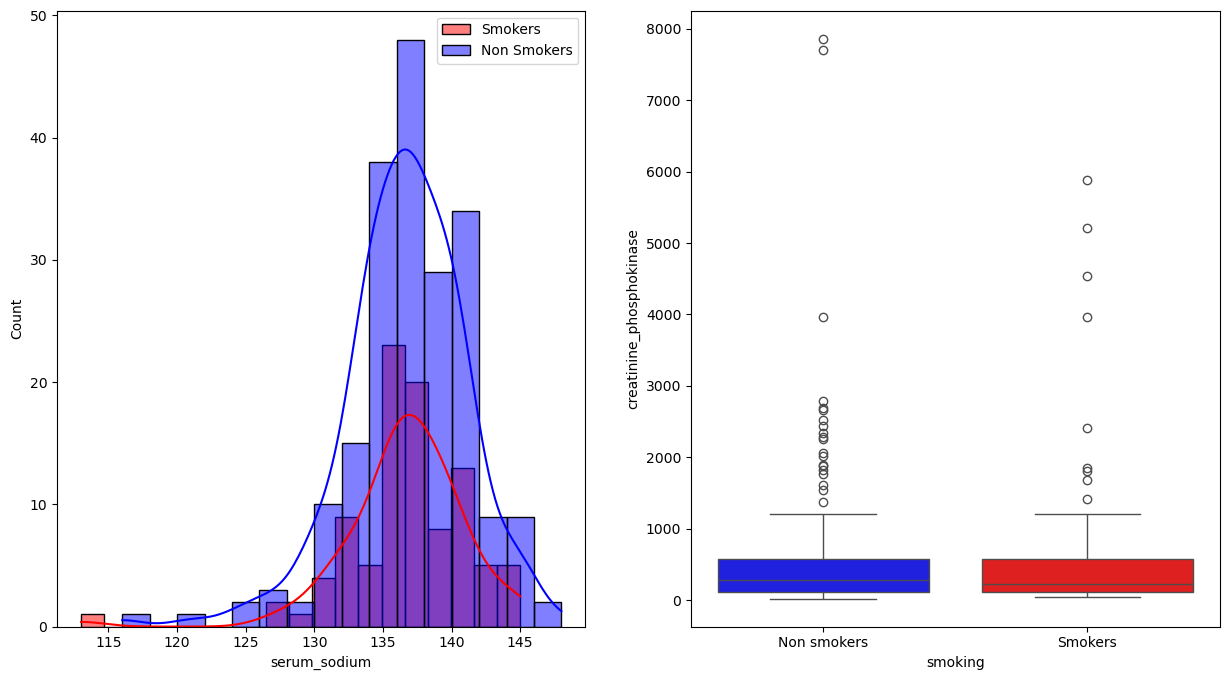

In [43]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['smoking'] == 'Smokers']['serum_sodium'], ax = axes[0], kde = True, label = 'Smokers', color = 'red')
sns.histplot(df[df['smoking'] == 'Non smokers']['serum_sodium'], ax = axes[0], kde = True, label = 'Non Smokers', color = 'blue')

pal = {'Smokers':'red', 'Non smokers': 'blue'}
sns.boxplot(x = df['smoking'], y = df['creatinine_phosphokinase'], palette=pal, ax=axes[1])

axes[0].legend()
plt.show()


creatinine Phosphokinase and Death Event

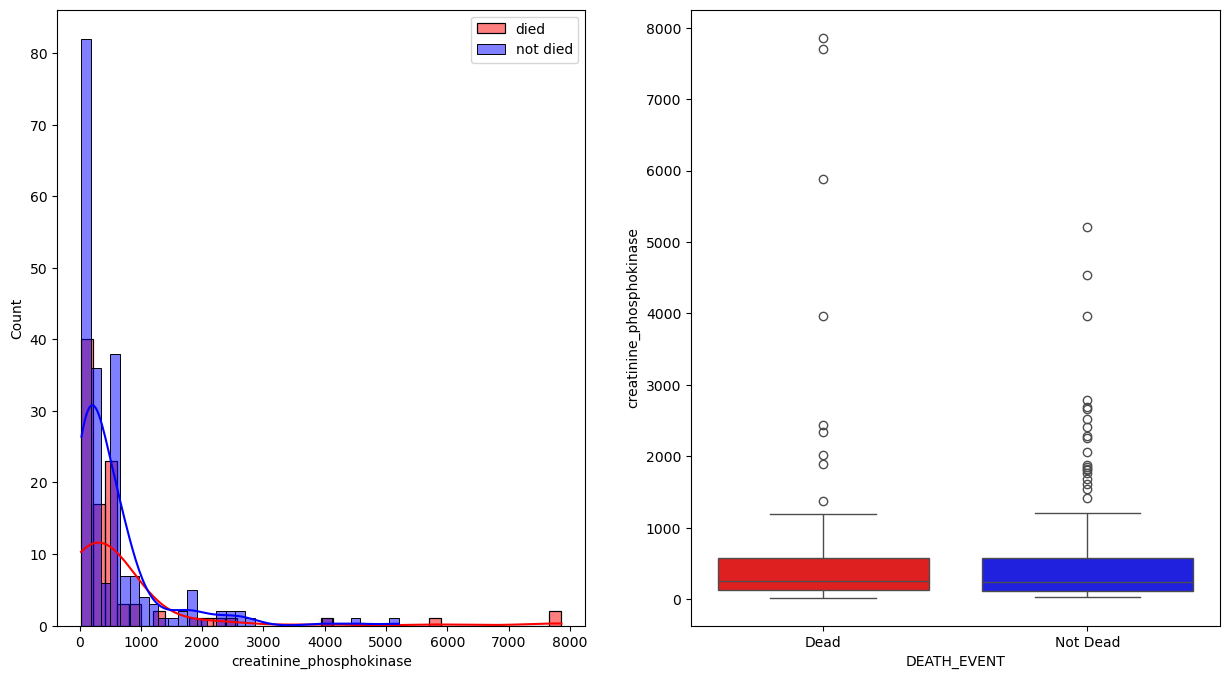

In [44]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase'], ax=axes[0], kde = True, label = 'died', color='red')
sns.histplot(df[df['DEATH_EVENT'] == 0]['creatinine_phosphokinase'], ax = axes[0], kde = True, label = 'not died', color = 'blue')

df['DEATH_EVENT'].map({1:'1',0:'0'})
pal = {"Dead":'red', "Not Dead": 'blue'}
sns.boxplot(x = df['DEATH_EVENT'].map({1:'Dead', 0:'Not Dead'}), y = df['creatinine_phosphokinase'], palette=pal, ax=axes[1])
axes[0].legend()
plt.show()

**creatinine phosphokinase and diabetes**

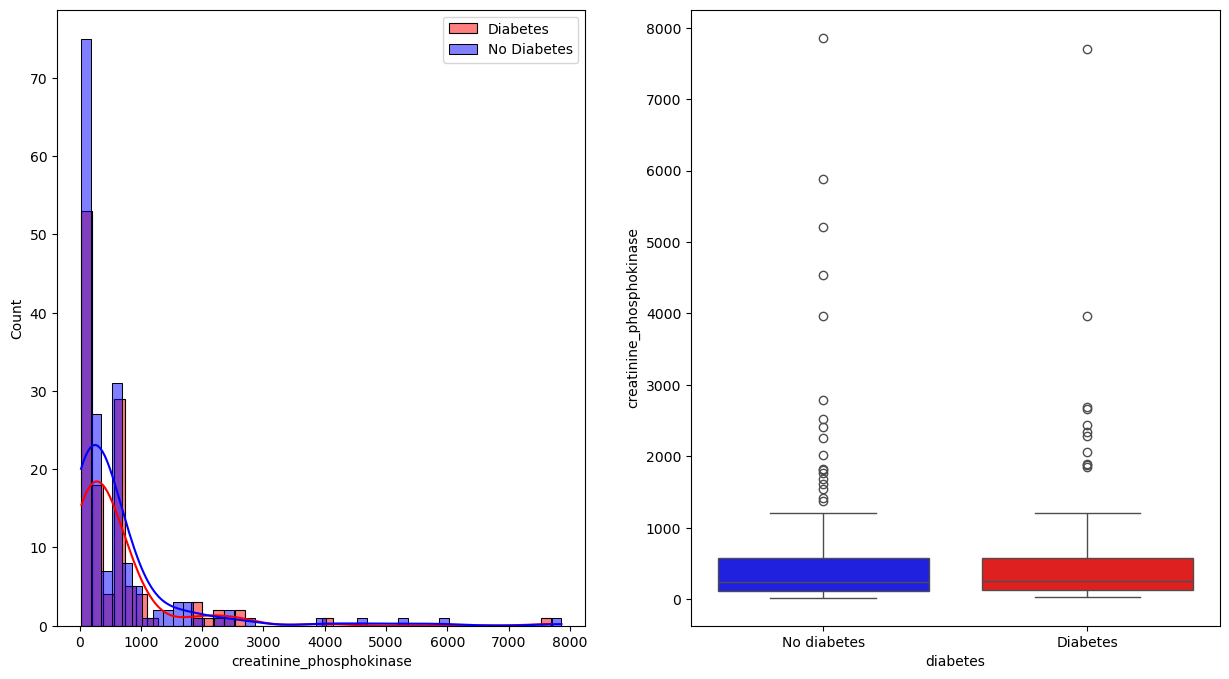

In [45]:
fig, axes = plt.subplots(1,2,figsize = (15, 8))

sns.histplot(df[df['diabetes'] == 'Diabetes']['creatinine_phosphokinase'], ax=axes[0], kde = True, label = 'Diabetes', color='red')
sns.histplot(df[df['diabetes'] == 'No diabetes']['creatinine_phosphokinase'], ax = axes[0], kde = True, label = 'No Diabetes', color = 'blue')

pal = {'Diabetes':'red', 'No diabetes': 'blue'}
sns.boxplot(x = df['diabetes'], y = df['creatinine_phosphokinase'], palette = pal, ax=axes[1])
axes[0].legend()
plt.show()

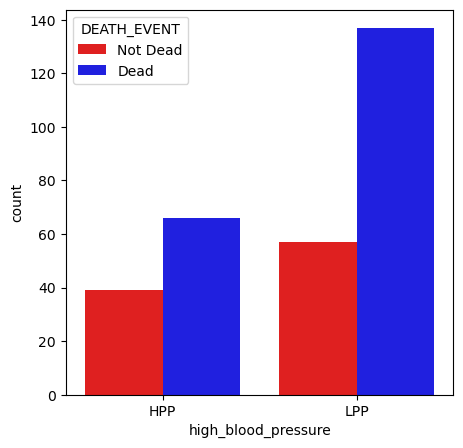

In [46]:
# HPP ----> High Blood Pressure, LPP ----> Low Blood Pressure
plt.figure(figsize=(5,5))
pal2 = {'Dead' : 'blue', 'Not Dead' : 'red'}
sns.countplot(x = df['high_blood_pressure'].map({1: 'HPP', 0: 'LPP'}), hue = df['DEATH_EVENT'].map({0:'Dead', 1:'Not Dead'}), palette= pal2)
plt.show()

In [47]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,No diabetes,20,1,265000.00,1.9,130,Male,Non smokers,4,1,71-80
1,55.0,0,7861,No diabetes,38,0,263358.03,1.1,136,Male,Non smokers,6,1,51-60
2,65.0,0,146,No diabetes,20,0,162000.00,1.3,129,Male,Smokers,7,1,61-70
3,50.0,1,111,No diabetes,20,0,210000.00,1.9,137,Male,Non smokers,7,1,51-60
4,65.0,1,160,Diabetes,20,0,327000.00,2.7,116,Female,Non smokers,8,1,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,Diabetes,38,1,155000.00,1.1,143,Male,Smokers,270,0,61-70
295,55.0,0,1820,No diabetes,38,0,270000.00,1.2,139,Female,Non smokers,271,0,51-60
296,45.0,0,2060,Diabetes,60,0,742000.00,0.8,138,Female,Non smokers,278,0,40-50
297,45.0,0,2413,No diabetes,38,0,140000.00,1.4,140,Male,Smokers,280,0,40-50


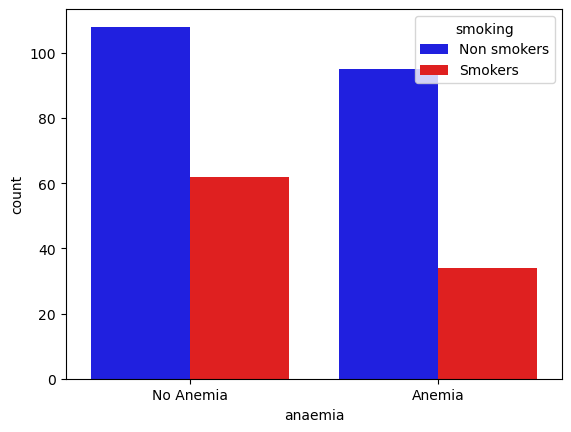

In [48]:
pal3 = {'Smokers':'red', 'Non smokers': 'blue'}

sns.countplot(x = df['anaemia'].map({0 : 'No Anemia', 1: 'Anemia'}), hue = df['smoking'], palette = pal3)
plt.show()

In [49]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,No diabetes,20,1,265000.00,1.9,130,Male,Non smokers,4,1,71-80
1,55.0,0,7861,No diabetes,38,0,263358.03,1.1,136,Male,Non smokers,6,1,51-60
2,65.0,0,146,No diabetes,20,0,162000.00,1.3,129,Male,Smokers,7,1,61-70
3,50.0,1,111,No diabetes,20,0,210000.00,1.9,137,Male,Non smokers,7,1,51-60
4,65.0,1,160,Diabetes,20,0,327000.00,2.7,116,Female,Non smokers,8,1,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,Diabetes,38,1,155000.00,1.1,143,Male,Smokers,270,0,61-70
295,55.0,0,1820,No diabetes,38,0,270000.00,1.2,139,Female,Non smokers,271,0,51-60
296,45.0,0,2060,Diabetes,60,0,742000.00,0.8,138,Female,Non smokers,278,0,40-50
297,45.0,0,2413,No diabetes,38,0,140000.00,1.4,140,Male,Smokers,280,0,40-50


**let's see time Attribute :** 

In [50]:
df['time'].describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

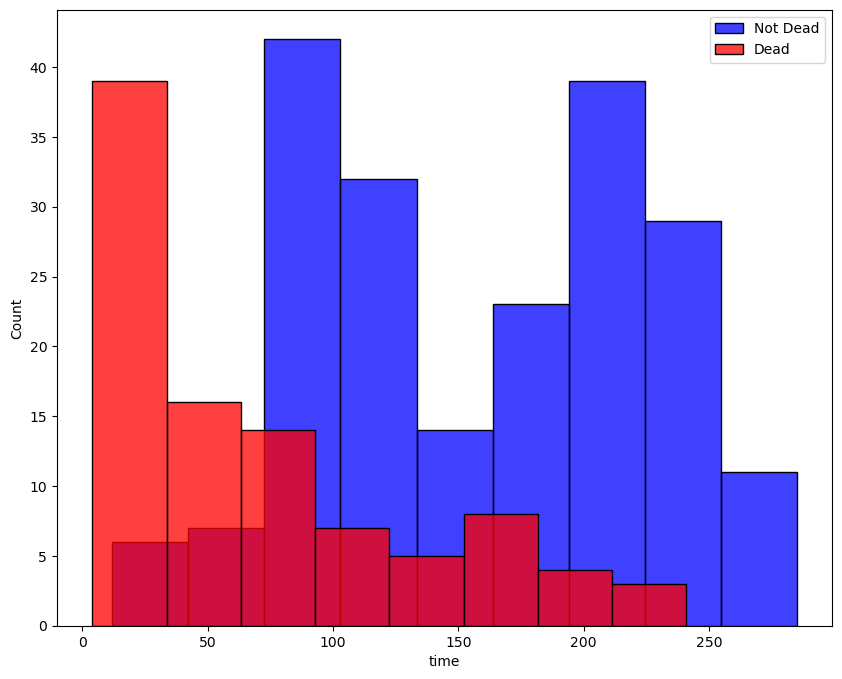

In [51]:
fig, axes3 = plt.subplots(figsize = (10,8))

sns.histplot(df[df['DEATH_EVENT'] == 0]['time'], ax = axes3, label = 'Not Dead', color='blue')
sns.histplot(df[df['DEATH_EVENT'] == 1]['time'], ax = axes3, label = 'Dead', color = 'red')

axes3.legend()
plt.show()

Patients who got diagnosed late, and visited the hospital less times were high likely to face the death !! 

In [52]:
correlation_data = df.copy()

In [53]:
correlation_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,No diabetes,20,1,265000.00,1.9,130,Male,Non smokers,4,1,71-80
1,55.0,0,7861,No diabetes,38,0,263358.03,1.1,136,Male,Non smokers,6,1,51-60
2,65.0,0,146,No diabetes,20,0,162000.00,1.3,129,Male,Smokers,7,1,61-70
3,50.0,1,111,No diabetes,20,0,210000.00,1.9,137,Male,Non smokers,7,1,51-60
4,65.0,1,160,Diabetes,20,0,327000.00,2.7,116,Female,Non smokers,8,1,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,Diabetes,38,1,155000.00,1.1,143,Male,Smokers,270,0,61-70
295,55.0,0,1820,No diabetes,38,0,270000.00,1.2,139,Female,Non smokers,271,0,51-60
296,45.0,0,2060,Diabetes,60,0,742000.00,0.8,138,Female,Non smokers,278,0,40-50
297,45.0,0,2413,No diabetes,38,0,140000.00,1.4,140,Male,Smokers,280,0,40-50


In [54]:
correlation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    int64   
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    int64   
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
 13  age_group                 299 non-null    category

In [55]:
correlation_data['smoking'] = correlation_data['smoking'].map({'Non smokers' : 0, 'Smokers':1})
correlation_data['diabetes'] = correlation_data['diabetes'].map({'No diabetes' : 0, 'Diabetes':1})
correlation_data['sex'] = correlation_data['sex'].map({'Male' : 0, 'Female':1})

In [56]:
correlation_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,0,4,1,71-80
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,0,6,1,51-60
2,65.0,0,146,0,20,0,162000.00,1.3,129,0,1,7,1,61-70
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,0,7,1,51-60
4,65.0,1,160,1,20,0,327000.00,2.7,116,1,0,8,1,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,0,1,270,0,61-70
295,55.0,0,1820,0,38,0,270000.00,1.2,139,1,0,271,0,51-60
296,45.0,0,2060,1,60,0,742000.00,0.8,138,1,0,278,0,40-50
297,45.0,0,2413,0,38,0,140000.00,1.4,140,0,1,280,0,40-50


<Axes: >

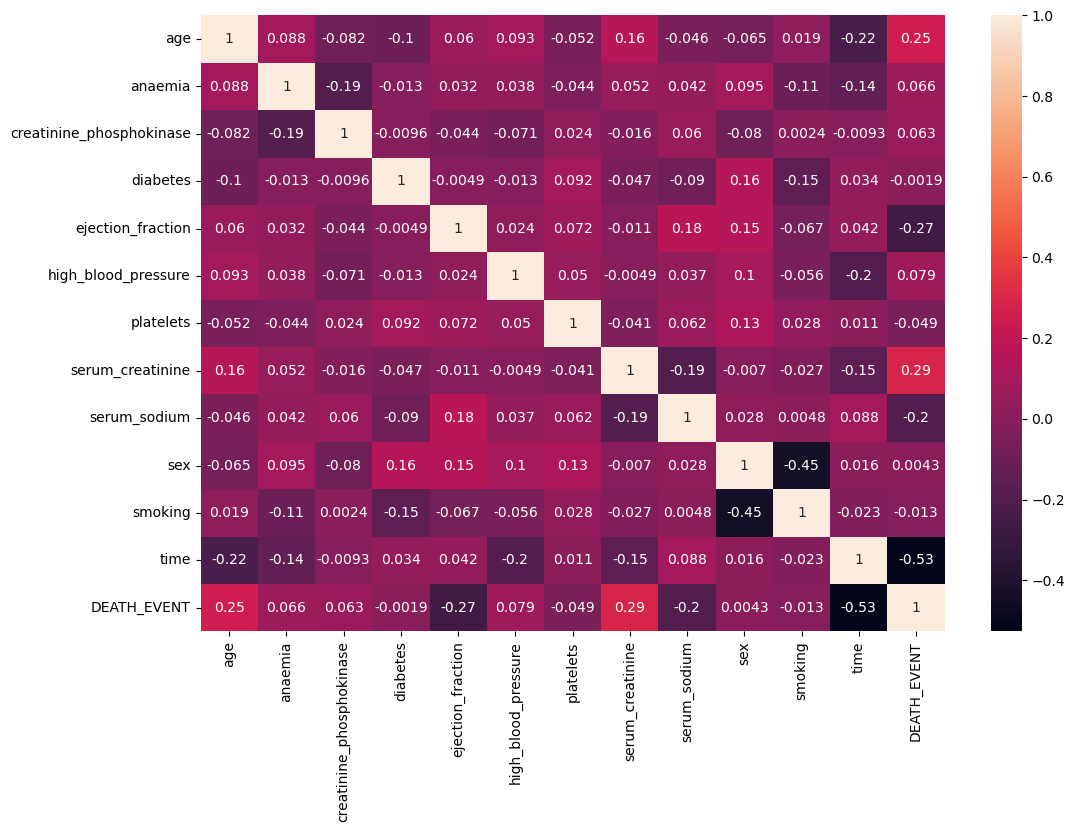

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_data.drop('age_group', axis = 1).corr(), annot=True)

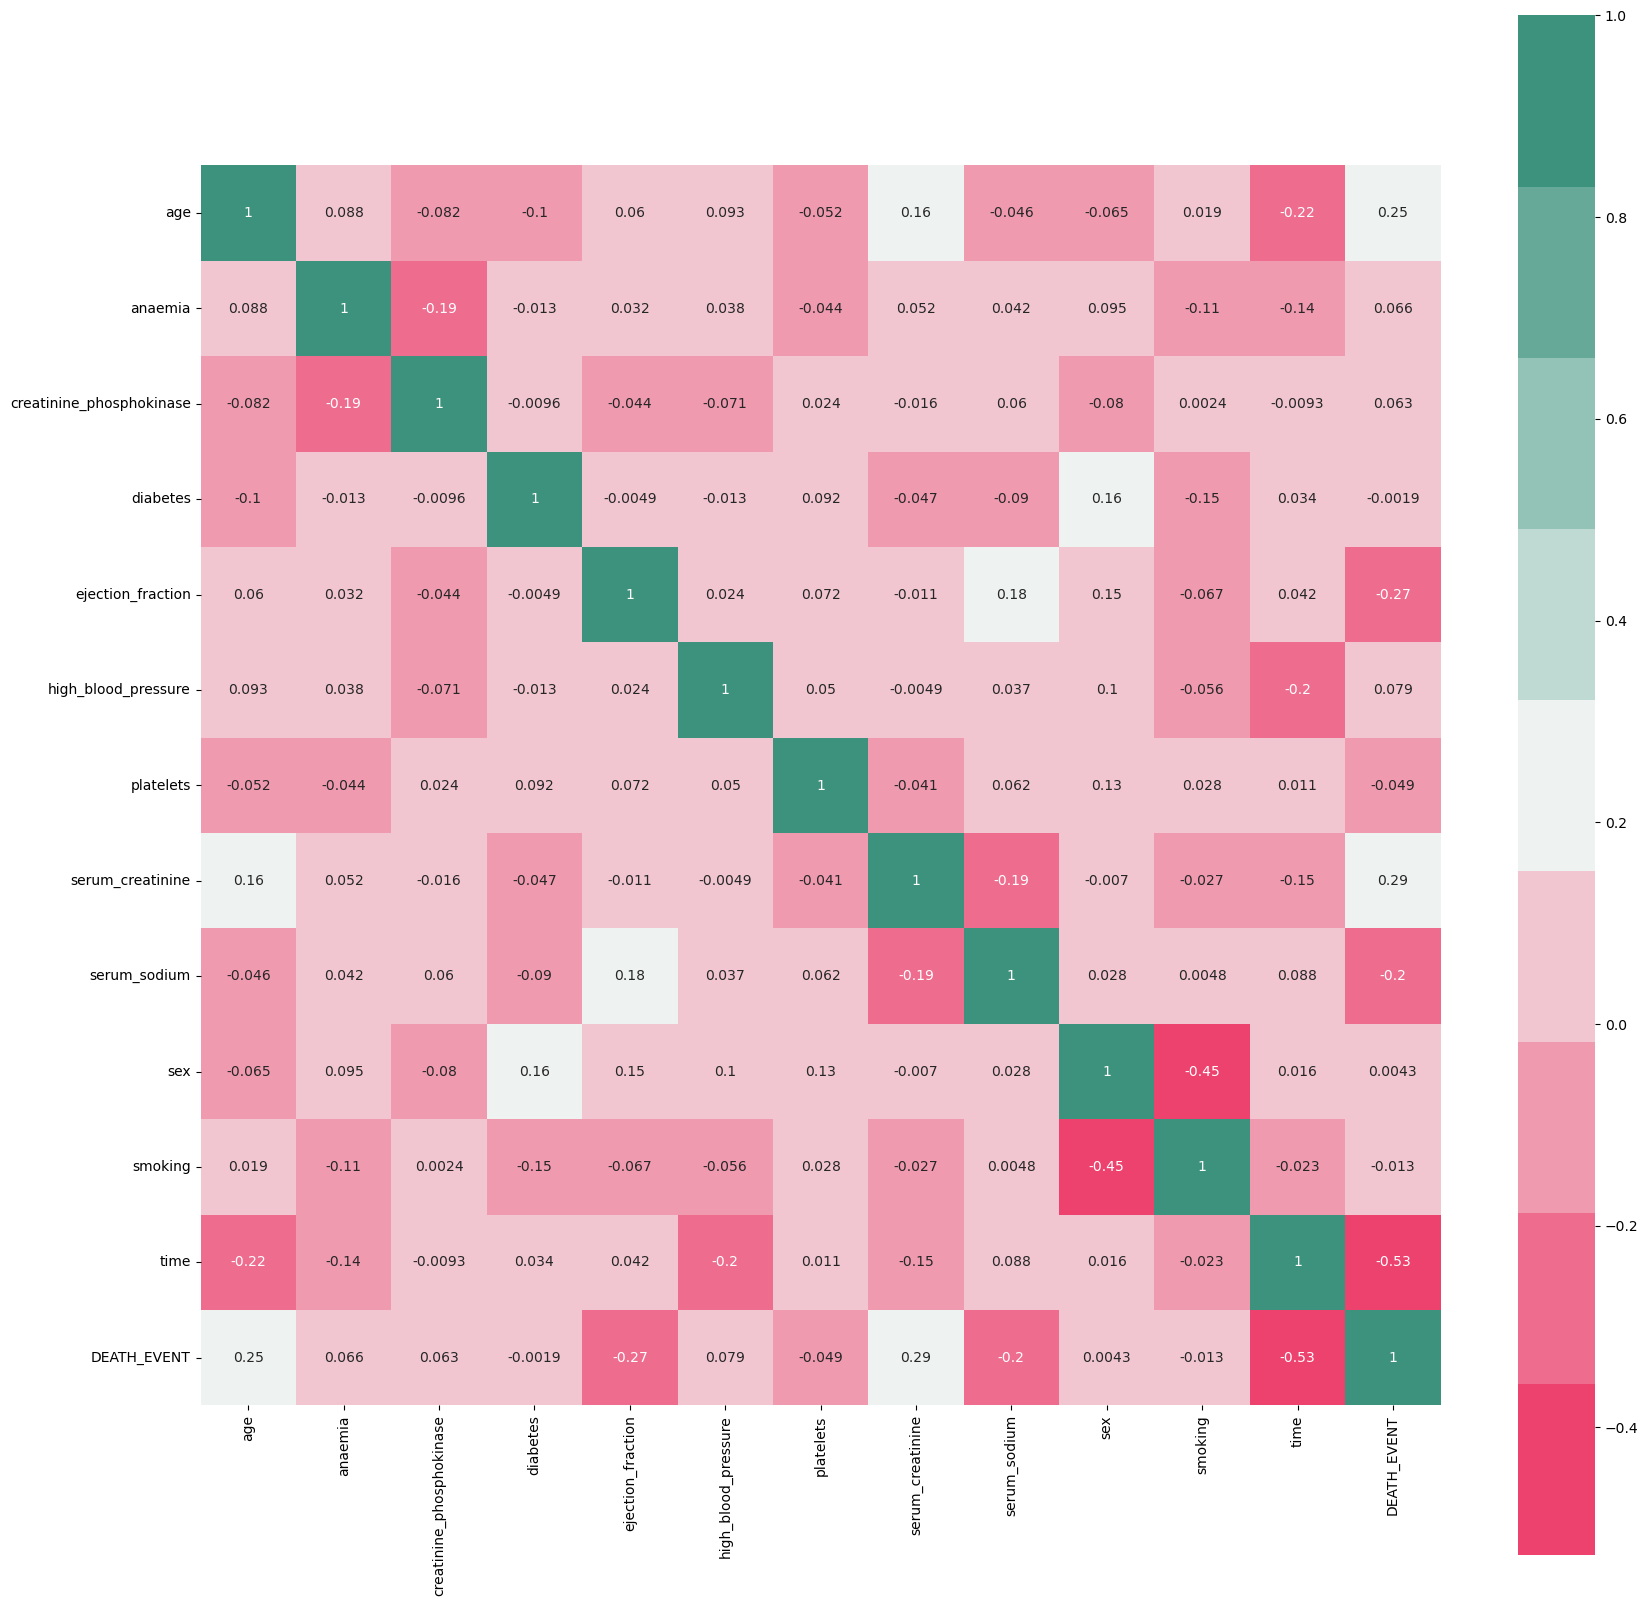

In [58]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = correlation_data.drop('age_group', axis = 1).corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)
plt.show()

**Final Notes on the EDA :**

- Features "creatinine_phosphokinase" & "serum creatinine" are significantly skewed.


- All the other features almost shows the normal distribution, since mean is equal to their respective medians.

- "time" is the most important feature as it would've been very crucial to get diagnosed early with cardivascular issue so as to get timely treatment thus, reducing the chances of any fatality. (Evident from the inverse relationship)

- "serum_creatinine" is the next important feature as serum's (essential component of blood) abundancy in blood makes it easier for heart to function.

- "ejection_fraction" has also significant influence on target variable which is expected since it is basically the efficiency of the heart.

- Can be seen from the inverse relation pattern that heart's functioning declines with ageing.

- Few Outliers can be seen in almost all the features


- Considering the size of the dataset and relevancy of it, we won't be dropping such outliers in data preprocessing which wouldn't bring any statistical fluke.

**<h1><center>FEATURE ENGINEERING AND DATA PREPERATION</center></h1>**


**lets first check if our dataset is imbalanced**

You typically mention that your dataset is imbalanced when the distribution of classes in your dataset is significantly skewed, meaning some classes have a lot more samples than others. This can affect the performance of your classification model because it may become biased towards the majority class, neglecting the minority classes.

It's important to address class imbalance because it can lead to misleadingly high accuracy scores, where the model may seem to perform well just by predicting the majority class most of the time. However, it might perform poorly on the minority classes, which could be the ones of interest.

In [59]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

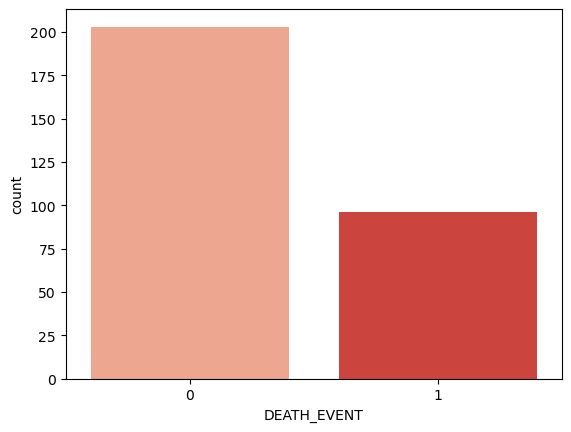

In [60]:
sns.barplot(df['DEATH_EVENT'].value_counts(), palette="Reds")
plt.show()

This Should be Considered asimbalanced dataset as most of the values are skewed towards (DEATH_EVENT = 1). but we will continue in our project for the sake of practice 

In [61]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,No diabetes,20,1,265000.00,1.9,130,Male,Non smokers,4,1,71-80
1,55.0,0,7861,No diabetes,38,0,263358.03,1.1,136,Male,Non smokers,6,1,51-60
2,65.0,0,146,No diabetes,20,0,162000.00,1.3,129,Male,Smokers,7,1,61-70
3,50.0,1,111,No diabetes,20,0,210000.00,1.9,137,Male,Non smokers,7,1,51-60
4,65.0,1,160,Diabetes,20,0,327000.00,2.7,116,Female,Non smokers,8,1,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,Diabetes,38,1,155000.00,1.1,143,Male,Smokers,270,0,61-70
295,55.0,0,1820,No diabetes,38,0,270000.00,1.2,139,Female,Non smokers,271,0,51-60
296,45.0,0,2060,Diabetes,60,0,742000.00,0.8,138,Female,Non smokers,278,0,40-50
297,45.0,0,2413,No diabetes,38,0,140000.00,1.4,140,Male,Smokers,280,0,40-50


**Features/Attributes to be removed/dropped :**

1- age_group (we dont need it in our modeling, ,as we have the age feature)

**Features to be encoded into 0 and 1 :**

1 - diabetes

2 - smoking

* All the dataset must be scaled/noramlized. 

In [62]:
df.drop('age_group', axis =1, inplace=True)

In [63]:
df['diabetes'] = df['diabetes'].map({'No diabetes': 0, 'Diabetes':1})
df['smoking'] = df['smoking'].map({'Smokers':1, 'Non smokers':0})

In [64]:
df['sex'] = df['sex'].map({'Male': 0 , 'Female': 1})

**Normalization of the data**

Data normalization is crucial before feeding data into a machine learning model for the following reasons:

**- Faster Convergence:** Optimization algorithms, like gradient descent, perform better with normalized data, speeding up convergence.

**- Balanced Feature Contribution:** Prevents features with larger ranges from dominating the model, ensuring all features contribute equally.

**- Reduced Overfitting:** Helps the model generalize better by preventing reliance on specific feature scales.

**- Increased Accuracy:** Leads to more accurate model predictions.

**- Stable Training:** Avoids numerical instabilities during training.

**- Effective Regularization:** Ensures regularization techniques work uniformly across all features.


Normalization techniques include Min-Max Scaling, Z-Score Standardization, and Robust Scaling, each aligning feature scales to enhance model performance and stability.


*In this Notebook we will be using **Z-score Standardization.***

In [65]:
from sklearn.preprocessing import StandardScaler

before doing the scaling we should seperate inputs and outpouts of the data, and then splitting the training set from testing set

In [66]:
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [67]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,0,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,0,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,1,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,1,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,0,1,280


In [68]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

**Train/Test Split**

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

Then we can proceed with data norrmalization

In [70]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now that we  have our data ready to be feeded to classification algorithms.

**<h1><center>MODELING</center></h1>**


Machine learning classification algorithms are techniques used to assign data points to predefined categories or classes based on their features. 

**We will be using :**

***1 - Random Forest***

<u>Type:</u> Ensemble method (bagging)

<u>Use Case:</u> Both binary and multi-class classification.

<u>Key Concept:</u> Constructs multiple decision trees and aggregates their predictions (majority voting).


***2 - Support Vector Machine (SVM)***

<u>Type:</u> Kernel-based model

<u>Use Case:</u> Binary classification (extendable to multi-class).

<u>Key Concept:</u> Finds the hyperplane that maximizes the margin between classes.

***3 - AdaBoost***

<u>Type:</u>  Ensemble method (boosting)

<u>Use Case:</u> Both binary and multi-class classification.

<u>Key Concept:</u> Combines multiple weak classifiers, focusing on misclassified instances to improve accuracy.

***4 - Neural Networks***

<u>Type:</u> Deep learning model

<u>Use Case:</u> Both binary and multi-class classification.

<u>Key Concept:</u> Composed of layers of interconnected nodes (neurons) to learn complex patterns.


----

In **random Forest**, **Support Vector Machine** we will be using the technique of Grid Search Cross validation 







GridSearchCV stands for Grid Search with Cross-Validation. It automates the process of searching for the best hyperparameters for a given model. Here's what it does:

- Hyperparameter Space Definition: You define a grid of hyperparameter values that you want to test. For example, if you're tuning a Support Vector Machine (SVM), you might want to try different values for the parameters C and gamma.

- Cross-Validation: For each combination of hyperparameters, GridSearchCV uses cross-validation to evaluate the model. Cross-validation is a technique where the data is split into k subsets (folds), and the model is trained on k-1 of these subsets and validated on the remaining subset. This process is repeated k times (with each subset used exactly once as the validation set), and the results are averaged to provide a more robust evaluation of the model's performance.

- Model Training and Evaluation: The model is trained and evaluated for each combination of hyperparameters using cross-validation. The performance metric (e.g., accuracy, F1 score) is recorded for each combination.

- Best Parameters Selection: After evaluating all combinations, GridSearchCV selects the set of hyperparameters that yields the best performance according to the specified metric.

1- Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

In [75]:
rf_model_acc = accuracy_score(y_test, y_pred)
rf_model_acc * 100

91.66666666666666

Random Forest + Gird Search

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#  more hyperparameter can be used in this GRID

In [78]:
rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_grid, cv = 3, scoring = 'accuracy')

In [79]:
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [80]:
y_pred = rf_grid.predict(X_test_scaled)

In [81]:
rf_grid_acc = accuracy_score(y_test, y_pred)

In [82]:
rf_grid_acc

0.9166666666666666

2- Supoer Vector Machine (SVM)

In [83]:
from sklearn .svm import SVC

sv_model = SVC()
sv_model.fit(X_train_scaled, y_train)
y_pred = sv_model.predict(X_test_scaled)
sv_model_acc = accuracy_score(y_test, y_pred)
sv_model_acc

0.75

SVC + GridSearch cv

In [84]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# More HyperParameters Can be Used in this Grid

In [85]:
svc_grid = GridSearchCV(estimator=SVC(), param_grid = param_grid, cv = 3, scoring='accuracy')
svc_grid.fit(X_train_scaled, y_train)
y_pred = svc_grid.predict(X_test_scaled)
svc_grid_acc = accuracy_score(y_test, y_pred)
svc_grid_acc

0.7666666666666667

Remember We can always View the best parameters & the best score obtained by the GridSearch CV for our model

In [87]:
print(svc_grid.best_params_)
print(svc_grid.best_score_) # training Score

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.8243143459915613


3 - ADABoost

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_scaled, y_train)
y_pred = ada_model.predict(X_test_scaled)
ada_model_acc = accuracy_score(y_test, y_pred)
ada_model_acc

0.8333333333333334

Slightly better :)

4 - ANN (Neural Network)

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [173]:
ann_model = Sequential()

ann_model.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'uniform', input_dim = 12))

ann_model.add(Dense(units = 12, activation = 'relu', kernel_initializer = 'uniform'))

ann_model.add(Dropout(0.25))

ann_model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'uniform'))

ann_model.add(Dropout(0.5))

ann_model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))


In [174]:
ann_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [175]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

In [176]:
history = ann_model.fit(X_train_scaled, y_train, batch_size=25, epochs = 150, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/150
8/8 [==============================] - 1s 29ms/step - loss: 0.6927 - accuracy: 0.6760 - val_loss: 0.6917 - val_accuracy: 0.6667
Epoch 2/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.6760 - val_loss: 0.6905 - val_accuracy: 0.6667
Epoch 3/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6760 - val_loss: 0.6890 - val_accuracy: 0.6667
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.6760 - val_loss: 0.6871 - val_accuracy: 0.6667
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6856 - accuracy: 0.6760 - val_loss: 0.6848 - val_accuracy: 0.6667
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 0.6832 - accuracy: 0.6760 - val_loss: 0.6817 - val_accuracy: 0.6667
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.6791 - accuracy: 0.6760 - val_loss: 0.6777 - val_accuracy: 0.6667
Epoch 8/150
8/8 [=========

After Alot of trial and error, (playing aroud with the neurons and layers) we got this accuracy

In [177]:
val_accuracy = np.mean(history.history['val_accuracy'])
val_accuracy

0.7154762063707624

This Notebook is still open for more enhancememnt in the accuracy obtained specially for the ANN, this can be obtained by doing more feature engineering and preprocessing for the data.